In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib widget
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

importlib.reload(tools)
importlib.reload(mf)


<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [2]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Fluo_Liquide/20240202_light_calib/"       
calib = pd.read_csv(folder + "20240202_light_calib.csv", sep=";")


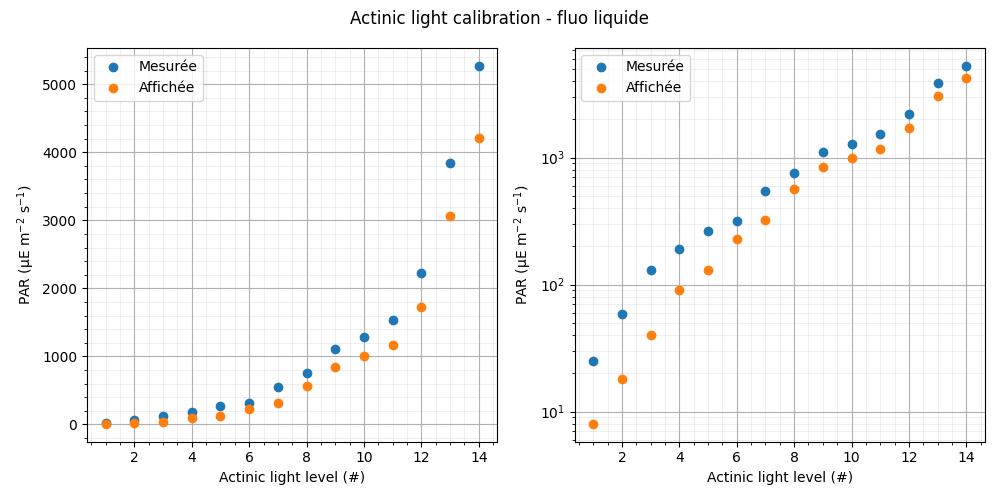

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Actinic light calibration - fluo liquide")   
for ax in axes:
    ax.plot(calib.E, calib.PAR, 'o', label = "Mesurée")
    ax.plot(calib.E, calib.SET, 'o', label = "Affichée")
    ax.set_xlabel("Actinic light level (#)")
    ax.set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
    ax.legend()
    ax.minorticks_on()
    ax.grid(True, which='both')
    ax.grid(which = 'minor', alpha = 0.2)
axes[1].set_yscale('log')
fig.tight_layout()
fig.savefig(folder + "20240202_light_calib.png", dpi=300)

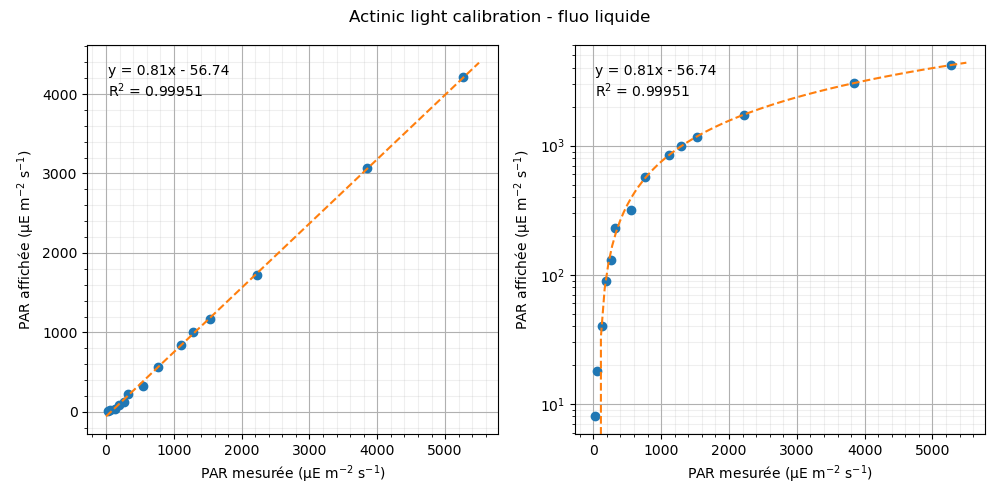

In [4]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
for ax in axes:
    ax.plot(calib.PAR, calib.SET, 'o')
    ax.set_ylabel("PAR affichée (µE m$^{-2}$ s$^{-1}$)")
    ax.set_xlabel("PAR mesurée (µE m$^{-2}$ s$^{-1}$)")
    popt, xfit, yfit, rs = tools.lin_fit(calib.PAR, calib.SET, 0, 5500, 100)
    ax.plot(xfit, yfit, '--')
    ax.text(0.05, 0.95, "y = {:.2f}x - {:.2f}\nR$^2$ = {:.5f}".format(popt[0], -popt[1], rs), transform=ax.transAxes, va='top', ha='left')
    ax.minorticks_on()
    ax.grid(True, which='both')
    ax.grid(which = 'minor', alpha = 0.2)
fig.suptitle("Actinic light calibration - fluo liquide")    
axes[1].set_yscale("log")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib.png", dpi=300)